# Plotting Calibration datasets
- This notebook shows how to plot the calibration dataset of each model. You can then overlay your data to check the cali range!

In [16]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PySulfSat as ss
ss.__version__

'0.0.10'

## Lets load SCSS models

In [3]:
df_S2017=ss.return_cali_dataset(model='S2017_SCSS')
df_LZ2022=ss.return_cali_dataset(model='LiZhang2022_SCSS')
df_Liu21=ss.return_cali_dataset(model='Liu2021_SCSS')
df_Blan=ss.return_cali_dataset(model='B2021_SCSS')
df_F2015=ss.return_cali_dataset(model='F2015_SCSS')

## Have a look at what you get!

In [19]:
df_LZ2022.head()

,Sample,P_kbar,T_K,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,...,S_Liq_ppm,logfO2,Fe_sulf_wt%,Cu_sulf_wt%,Ni_sulf_wt%,S_sulf_wt,Fe_FeNiCu_sulf,Cu_FeNiCu_sulf,Ni_FeNiCu_sulf,T_C
0,B-4,2.89,1323.15,44.58,4.54,12.84,13.11,5.47,9.48,2.58,...,NaN,-10.260196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0
1,B-11,3.12,1323.15,44.22,4.67,12.94,12.97,5.43,9.37,2.61,...,NaN,-10.044314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0
2,B-12,3.12,1323.15,43.86,4.69,12.77,14.29,5.57,9.47,2.59,...,NaN,-10.044314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0
3,B-13,3.12,1323.15,43.82,4.63,12.74,14.36,5.43,9.51,2.54,...,NaN,-10.044314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0
4,B-16,2.99,1323.15,46.55,3.55,14.74,12.97,4.26,8.83,3.16,...,NaN,-10.253291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0


## Lets plot on a TAS diagram

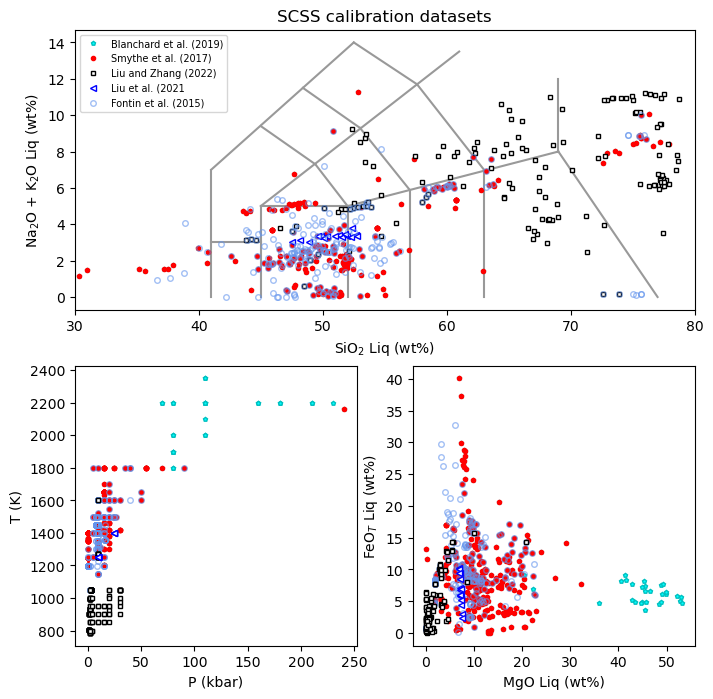

In [20]:
figure_mosaic="""
AA
BC
"""
fig, axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(8,8))
axes['A'].set_title('SCSS calibration datasets')

import tasplot
import matplotlib.pyplot as plt
tasplot.add_LeMaitre_fields(axes['A'])
for t in axes['A'].texts[:]:
    t.remove()
ms=3
  

axes['A'].plot(df_Blan['SiO2_Liq'], 
df_Blan['Na2O_Liq']+df_Blan['K2O_Liq'], 'pc', mfc='cyan', ms=3,
label='Blanchard et al. (2019)')  

axes['A'].plot(df_S2017['SiO2_Liq'], 
df_S2017['Na2O_Liq']+df_S2017['K2O_Liq'], 'or', mfc='red', ms=3,
label='Smythe et al. (2017)')

axes['A'].plot(df_LZ2022['SiO2_Liq'], 
df_LZ2022['Na2O_Liq']+df_LZ2022['K2O_Liq'], 'sk', mfc='w', ms=3,
label='Liu and Zhang (2022)')

axes['A'].plot(df_Liu21['SiO2_Liq'], 
df_Liu21['Na2O_Liq']+df_Liu21['K2O_Liq'], '<b', mfc='w', ms=4,
label='Liu et al. (2021')

axes['A'].plot(df_F2015['SiO2_Liq'], 
df_F2015['Na2O_Liq']+df_F2015['K2O_Liq'], 'o',
        mec='cornflowerblue', mfc='None', ms=4, alpha=0.6,
label='Fontin et al. (2015)')

axes['A'].set_xlim([30, 80])

x2='P_kbar'
y2='T_C'
axes['B'].plot(df_Blan[x2], 
df_Blan[y2], 'pc', mfc='cyan', ms=3)  

axes['B'].plot(df_S2017[x2], 
df_S2017[y2], 'or', mfc='red', ms=3) 

axes['B'].plot(df_F2015[x2], 
df_F2015[y2],  'o',  mec='cornflowerblue',
    mfc='None', ms=4, alpha=0.6)

axes['B'].plot(df_LZ2022[x2], 
df_LZ2022[y2], 'sk', mfc='w', ms=3) 

axes['B'].plot(df_Liu21[x2], 
df_Liu21[y2], '<b', mfc='w', ms=4)

# axes['B'].set_xlim([1000, 2000])
# axes['B'].set_ylim([-0.5, 21])

x3='MgO_Liq'
y3='FeOt_Liq'
axes['C'].plot(df_Blan[x3], 
df_Blan[y3], 'pc', mfc='cyan', ms=3)  

axes['C'].plot(df_S2017[x3], 
df_S2017[y3], 'or', mfc='red', ms=3) 

axes['C'].plot(df_F2015[x3], 
df_F2015[y3],  'o',  mec='cornflowerblue',
    mfc='None', ms=4, alpha=0.6)

axes['C'].plot(df_LZ2022[x3], 
df_LZ2022[y3], 'sk', mfc='w', ms=3) 

axes['C'].plot(df_Liu21[x3], 
df_Liu21[y3], '<b', mfc='w', ms=4) 
axes['A'].set_xlabel('SiO$_2$ Liq (wt%)')
axes['A'].set_ylabel('Na$_2$O + K$_2$O Liq (wt%)')

axes['B'].set_xlabel('P (kbar)')
axes['B'].set_ylabel('T (K)')

axes['C'].set_xlabel('MgO Liq (wt%)')
axes['C'].set_ylabel('FeO$_T$ Liq (wt%)')

axes['A'].legend(loc='upper left', fontsize=7)

fig.savefig('cali_datasets_SCSS.png', dpi=200)

## SCAS models

In [21]:
df_CD2019=ss.return_cali_dataset(model="CD2019_SCAS")
df_ZT2022=ss.return_cali_dataset(model='ZT2022_SCAS')
df_MK_2015=ss.return_cali_dataset(model='MK_2015')

## Tas diagram

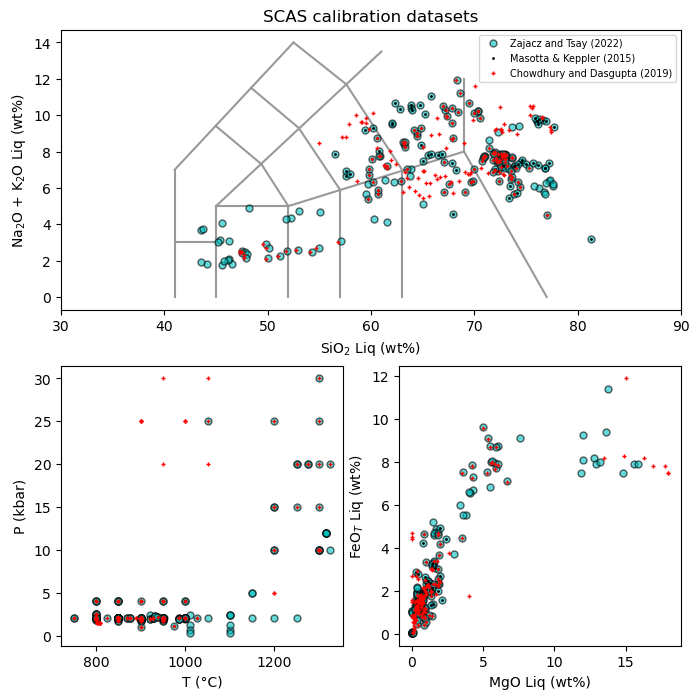

In [22]:
figure_mosaic="""
AA
BC
"""
fig, axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(8,8))
axes['A'].set_title('SCAS calibration datasets')
import tasplot
import matplotlib.pyplot as plt
tasplot.add_LeMaitre_fields(axes['A'])
for t in axes['A'].texts[:]:
    t.remove()
ms=3
  



axes['A'].plot(df_ZT2022['SiO2_Liq'], 
df_ZT2022['Na2O_Liq']+df_ZT2022['K2O_Liq'],
    'ok', mfc='c', ms=5, alpha=0.6, label='Zajacz and Tsay (2022)')

axes['A'].plot(df_MK_2015['SiO2_Liq'], 
df_MK_2015['Na2O_Liq']+df_MK_2015['K2O_Liq'], 
               '.k', ms=2, label='Masotta & Keppler (2015)')
axes['A'].plot(df_CD2019['SiO2_Liq'], 
df_CD2019['Na2O_Liq']+df_CD2019['K2O_Liq'],
'+r', mfc='red', ms=3, label='Chowdhury and Dasgupta (2019)')


axes['A'].set_xlim([30, 90])

y2='P_kbar'
x2='T_C'

axes['B'].plot(df_ZT2022[x2], 
df_ZT2022[y2],  'ok', mfc='c', ms=5, alpha=0.6) 

axes['B'].plot(df_MK_2015[x2], 
df_MK_2015[y2],  '.k', ms=2)


axes['B'].plot(df_CD2019[x2], 
df_CD2019[y2], '+r', mfc='red', ms=3) 



x3='MgO_Liq'
y3='FeOt_Liq'


axes['C'].plot(df_ZT2022[x3], 
df_ZT2022[y3],  'ok', mfc='c', ms=5, alpha=0.6) 

axes['C'].plot(df_MK_2015[x3], 
df_MK_2015[y3],  '.k', ms=2)


axes['C'].plot(df_CD2019[x3], 
df_CD2019[y3], '+r', mfc='red', ms=3) 

axes['A'].set_xlabel('SiO$_2$ Liq (wt%)')
axes['A'].set_ylabel('Na$_2$O + K$_2$O Liq (wt%)')

axes['B'].set_ylabel('P (kbar)')
axes['B'].set_xlabel('T (°C)')

axes['C'].set_xlabel('MgO Liq (wt%)')
axes['C'].set_ylabel('FeO$_T$ Liq (wt%)')
axes['A'].legend(fontsize=7)
fig.savefig('cali_datasets_SCAS.pdf', dpi=200)

## Lets add some of your data!

In [23]:
Pin=pd.read_excel('Pinatubo_data.xlsx')
Pin

,Sample,T_C,P(bar),P_kbar,CaO,T_K,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,H2O_Liq,* Data from Masotta supplement
0,Pinatubo 1991,850,2000,2,0.5,1123.15,68.580974,0.471167,17.119068,4.711670,2.209250,0.5,4.659318,1.748553,5,NaN
1,Pinatubo 1991,850,2000,2,1.0,1123.15,68.236346,0.468799,17.033042,4.687993,2.198148,1.0,4.635904,1.739766,5,NaN
2,Pinatubo 1991,850,2000,2,1.5,1123.15,67.891718,0.466432,16.947017,4.664317,2.187046,1.5,4.612491,1.730980,5,NaN
3,Pinatubo 1991,850,2000,2,2.0,1123.15,67.547090,0.464064,16.860991,4.640640,2.175944,2.0,4.589077,1.722193,5,NaN
4,Pinatubo 1991,850,2000,2,2.5,1123.15,67.202462,0.461696,16.774966,4.616963,2.164843,2.5,4.565663,1.713406,5,NaN


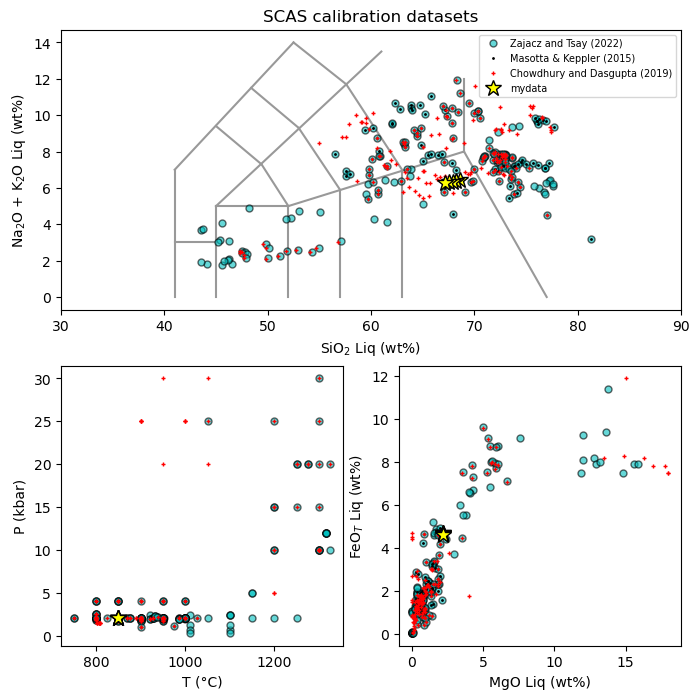

In [24]:
figure_mosaic="""
AA
BC
"""
fig, axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(8,8))
axes['A'].set_title('SCAS calibration datasets')
import tasplot
import matplotlib.pyplot as plt
tasplot.add_LeMaitre_fields(axes['A'])
for t in axes['A'].texts[:]:
    t.remove()
ms=3
  



axes['A'].plot(df_ZT2022['SiO2_Liq'], 
df_ZT2022['Na2O_Liq']+df_ZT2022['K2O_Liq'],
    'ok', mfc='c', ms=5, alpha=0.6, label='Zajacz and Tsay (2022)')

axes['A'].plot(df_MK_2015['SiO2_Liq'], 
df_MK_2015['Na2O_Liq']+df_MK_2015['K2O_Liq'], 
               '.k', ms=2, label='Masotta & Keppler (2015)')
axes['A'].plot(df_CD2019['SiO2_Liq'], 
df_CD2019['Na2O_Liq']+df_CD2019['K2O_Liq'],
'+r', mfc='red', ms=3, label='Chowdhury and Dasgupta (2019)')

axes['A'].plot(Pin['SiO2_Liq'],
            Pin['Na2O_Liq']+Pin['K2O_Liq'] , 
               '*k', mfc='yellow', ms=12, label='mydata')

axes['A'].set_xlim([30, 90])

y2='P_kbar'
x2='T_C'

axes['B'].plot(df_ZT2022[x2], 
df_ZT2022[y2],  'ok', mfc='c', ms=5, alpha=0.6) 

axes['B'].plot(df_MK_2015[x2], 
df_MK_2015[y2],  '.k', ms=2)


axes['B'].plot(df_CD2019[x2], 
df_CD2019[y2], '+r', mfc='red', ms=3) 

axes['B'].plot(Pin[x2],
            Pin[y2] , 
               '*k', mfc='yellow', ms=12)


x3='MgO_Liq'
y3='FeOt_Liq'


axes['C'].plot(df_ZT2022[x3], 
df_ZT2022[y3],  'ok', mfc='c', ms=5, alpha=0.6) 

axes['C'].plot(df_MK_2015[x3], 
df_MK_2015[y3],  '.k', ms=2)


axes['C'].plot(df_CD2019[x3], 
df_CD2019[y3], '+r', mfc='red', ms=3) 

axes['C'].plot(Pin[x3],
            Pin[y3] , 
               '*k', mfc='yellow', ms=12)


axes['A'].set_xlabel('SiO$_2$ Liq (wt%)')
axes['A'].set_ylabel('Na$_2$O + K$_2$O Liq (wt%)')

axes['B'].set_ylabel('P (kbar)')
axes['B'].set_xlabel('T (°C)')

axes['C'].set_xlabel('MgO Liq (wt%)')
axes['C'].set_ylabel('FeO$_T$ Liq (wt%)')
axes['A'].legend(fontsize=7)
fig.savefig('cali_datasets_SCAS.pdf', dpi=200)